## James Griffin 
### Kelly Blue Book Report 

HOW MUCH IS YOUR CAR WORTH?

For over 90 years, Kelley Blue Book (KBB) has been the trusted resource for used car values, helping car owners understand what their used car is worth. The “blue book value” of the car is determined by actual sales transactions and auction prices, which are then analyzed and adjusted to account for seasonality and market trends. Kelley Blue Book Values also reflect local conditions in over 100 different geographic regions and are updated weekly to give consumers the most up-to-date used car pricing information.
For this analysis you are going to analyze a subset of data from (KBB) to help consumers (i) understand why their car has the KBB value it has and (ii) give a price range that consumers can expect on a resale from their car. For this data set, a representative sample of over eight hundred GM cars were selected, then retail price was calculated from the tables provided in the Central Edition of the Kelly Blue Book. The data set contains the following variables:
• Price: suggested retail price of the used 2005 GM car in excellent condition. The condition of a car can greatly affect price. All cars in this data set were less than one year old when priced and considered to be in excellent condition.
• Mileage: number of miles the car has been driven
• Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
• Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
• Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D
• Type: body type such as sedan, coupe, etc.
• Cylinder: number of cylinders in the engine
• Liter: a more specific measure of engine size
• Doors: number of doors
• Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
• Sound: indicator variable representing whether the car has upgraded speakers (1 = up- graded)
• Leather: indicator variable representing whether the car has leather seats (1 = leather)
The specific research questions that you are tasked with addressing are the following. If neces-
sary, you may use more than 1 “model” to answer the questions.
1. What factors lead to higher/lower resale values?
2. Are there other factors not included in this dataset that likely explain how much a car is worth? If so, what other factors do you think explain resale value?

3. Generally, as mileage increases, the price should decrease. But, does the amount of de- crease in value from additional mileage differ depending upon the make of the car? If so, which makes hold the value better with more miles?
4. Which car (and with what characteristics) has the highest resale value at 15000 miles?
5. What is a reasonable resale value for the following vehicle: Cadillac CTS 4D Sedan with 17,000 miles, 6 cylinder, 2.8 liter engine, cruise control, upgraded speakers and leather seats?

In [54]:
#importing 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.decomposition import PCA
from pandas.plotting import scatter_matrix

In [236]:
#importing the data and getting taking a  look at it 
data = pd.read_csv("../data/kelly_bb.csv")
data.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.10313,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.03608,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.84786,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.91314,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.17032,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [237]:
# ok want to look at what categorical variables we have and the values that there are in there 
data.Make.value_counts()

Chevrolet    320
Pontiac      150
SAAB         114
Buick         80
Cadillac      80
Saturn        60
Name: Make, dtype: int64

In [238]:
make_d = pd.get_dummies(data.Make)
data = pd.concat([data, make_d], axis = 1)

In [239]:
data.Trim.value_counts()

Sedan 4D               170
Coupe 2D                50
LS Sedan 4D             50
LT Sedan 4D             30
LS Coupe 2D             30
Quad Coupe 2D           20
Aero Sedan 4D           20
SE Sedan 4D             20
Arc Sedan 4D            20
GT Sedan 4D             20
Linear Wagon 4D         14
L300 Sedan 4D           10
LT Coupe 2D             10
GTP Sedan 4D            10
Custom Sedan 4D         10
MAXX Hback 4D           10
AWD Sportwagon 4D       10
Arc Conv 2D             10
Special Ed Ultra 4D     10
LS MAXX Hback 4D        10
DHS Sedan 4D            10
DTS Sedan 4D            10
GT Sportwagon           10
Linear Conv 2D          10
Aero Wagon 4D           10
Aero Conv 2D            10
Arc Wagon 4D            10
Linear Sedan 4D         10
Limited Sedan 4D        10
Conv 2D                 10
SS Coupe 2D             10
LS Sport Sedan 4D       10
Sportwagon 4D           10
GT Coupe 2D             10
CXL Sedan 4D            10
GXP Sedan 4D            10
CX Sedan 4D             10
S

Ok so these are going to be highly colinear with make, the trim levels do give lots of information as to the initial value of a car... so I think that the best thing to do here would be to group by and create interactions for the trim/make variables, that way you capture the information that is there. Although these will also have all of the door data, so maybe I will drop the door data from there and then go from there 

In [240]:
data.Trim[0][:-3]
data['Trim'] = data.Trim.apply(lambda x: x[:-3])

In [241]:
def get_make_trim(df):
    mt = []
    for i in range(len(df)):
        mt.append(df.Make[i]+str(" ")+df.Model[i])
    df['make*trim'] =  mt
    mtd = pd.get_dummies(df['make*trim'])
    df = pd.concat([data, mtd], axis = 1)
    return  df 
data = get_make_trim(data)

In [242]:
data['make*trim'].value_counts()

Chevrolet Malibu         60
Chevrolet AVEO           60
Chevrolet Cavalier       60
Chevrolet Cobalt         50
Saturn Ion               50
SAAB 9_3 HO              40
Pontiac Grand Prix       30
SAAB 9_5                 30
Pontiac Bonneville       30
Buick Lacrosse           30
Pontiac Vibe             30
Cadillac Deville         30
Chevrolet Impala         30
Chevrolet Monte Carlo    30
Pontiac Grand Am         20
SAAB 9_3                 20
Buick Park Avenue        20
Buick Lesabre            20
SAAB 9_5 HO              20
Chevrolet Corvette       20
Pontiac G6               20
Cadillac STS-V8          10
Saturn L Series          10
Pontiac GTO              10
Cadillac STS-V6          10
Pontiac Sunfire          10
Cadillac XLR-V8          10
Cadillac CTS             10
Chevrolet Classic        10
Cadillac CST-V           10
Buick Century            10
SAAB 9-2X AWD             4
Name: make*trim, dtype: int64

I wanted to see if I could combine a couple of these, lessen the size of the features set, but I was doing some research cuz I saw that I have both SAAB 9_5 HO and SAAB 9_5, and SAAB 9_3 HO and SAAB 9_3 HO, however the HO is a turbo engine, so that would defeate the purpose of getting the trim levels in the first place... so decided to keep them seperate 

I think I feel good about dropping the model variable out of the analysis, I think that  would be very colinear with the trim, because the trims are subsets of the models, and so going more granular on the trimps with the makes means that I capture most of the information with the make_trim that  I would from the make_model interaction. 

In [243]:
data.Type.value_counts()
type_d = pd.get_dummies(data.Type)
data = pd.concat([data, type_d], axis = 1)


In [244]:
data.columns

Index(['Price', 'Mileage', 'Make', 'Model', 'Trim', 'Type', 'Cylinder',
       'Liter', 'Doors', 'Cruise', 'Sound', 'Leather', 'Buick', 'Cadillac',
       'Chevrolet', 'Pontiac', 'SAAB', 'Saturn', 'make*trim', 'Buick Century',
       'Buick Lacrosse', 'Buick Lesabre', 'Buick Park Avenue',
       'Cadillac CST-V', 'Cadillac CTS', 'Cadillac Deville', 'Cadillac STS-V6',
       'Cadillac STS-V8', 'Cadillac XLR-V8', 'Chevrolet AVEO',
       'Chevrolet Cavalier', 'Chevrolet Classic', 'Chevrolet Cobalt',
       'Chevrolet Corvette', 'Chevrolet Impala', 'Chevrolet Malibu',
       'Chevrolet Monte Carlo', 'Pontiac Bonneville', 'Pontiac G6',
       'Pontiac GTO', 'Pontiac Grand Am', 'Pontiac Grand Prix',
       'Pontiac Sunfire', 'Pontiac Vibe', 'SAAB 9-2X AWD', 'SAAB 9_3',
       'SAAB 9_3 HO', 'SAAB 9_5', 'SAAB 9_5 HO', 'Saturn Ion',
       'Saturn L Series', 'Convertible', 'Coupe', 'Hatchback', 'Sedan',
       'Wagon'],
      dtype='object')

In [245]:
print("mileage mean")
print(np.mean(data.Mileage))
print("mileage standard deviation")
print((np.var(data.Mileage))**(1/2))

mileage mean
19831.93407960199
mileage standard deviation
8191.220907144098


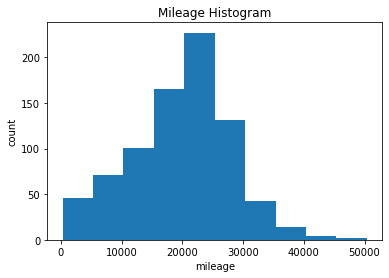

In [246]:
#looking at the milage variable, like what is the distribution like? what is the dealio ya know? 
plt.hist(data.Mileage)
plt.title("Mileage Histogram")
plt.ylabel("count")
plt.xlabel("mileage")
plt.show()

Ok so pretty normally distributed, that is good, lets look at some of the other variables in relation to the share price in scatter plots 

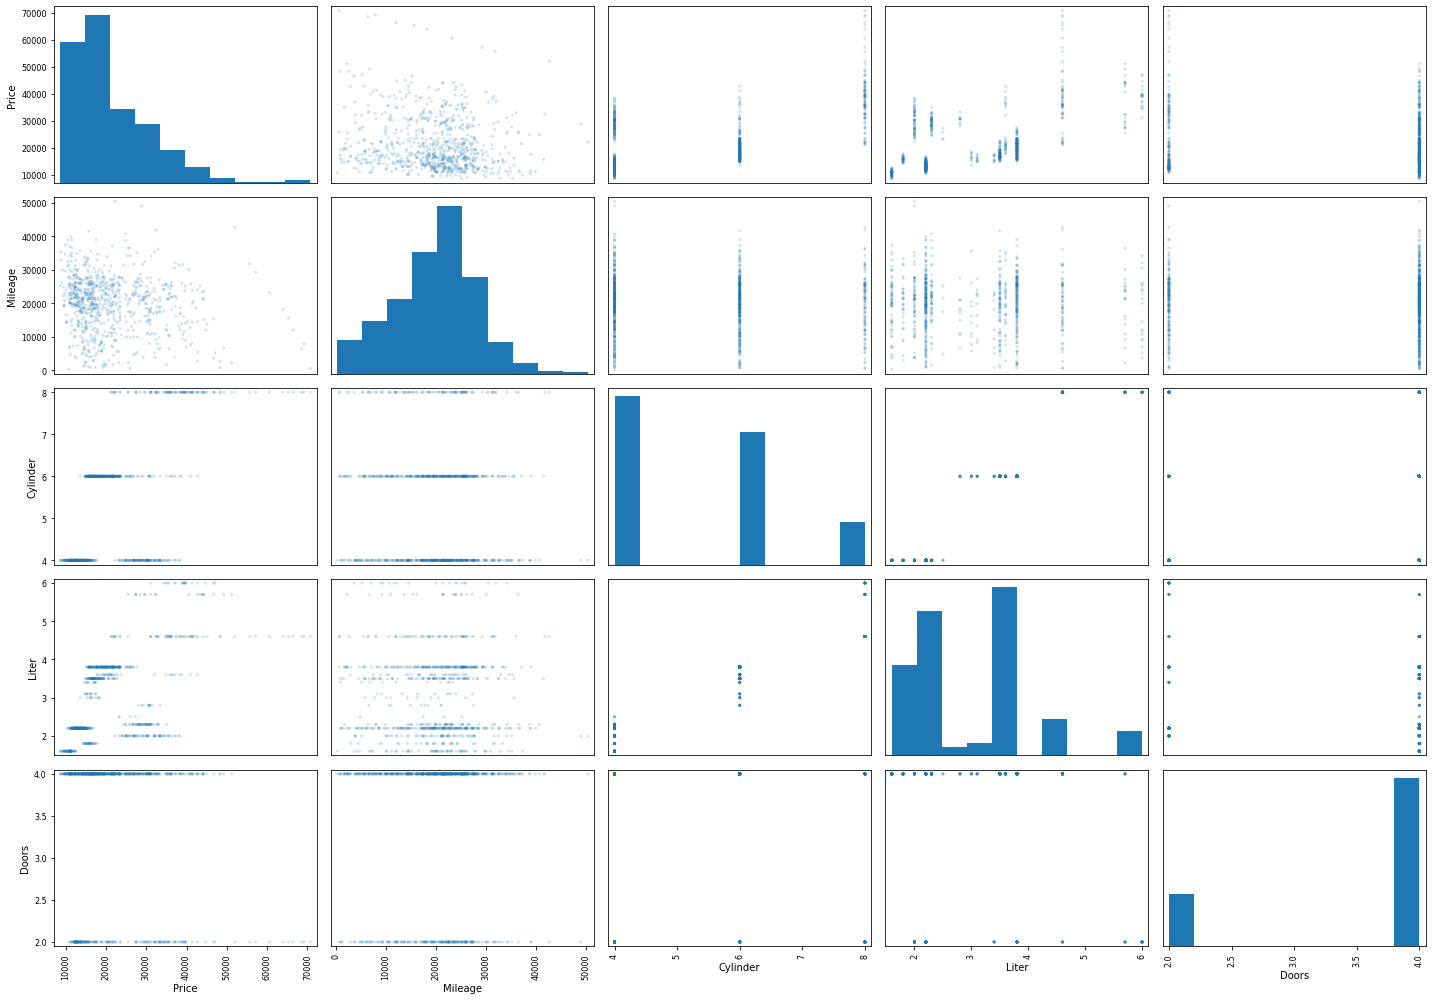

In [247]:

# call the function above these lines, these will make it cleaner and display the image
scatter = data[["Price", "Mileage", "Cylinder",
                  "Liter", "Doors",]]
scatter_matrix(scatter, alpha = .2, figsize= [20, 14])
scatter_matrix
plt.tight_layout()
plt.show()

ok yeah so good to know, our price variable is pretty skewed right, so we'll want to take the log of that, I was worried about perhaps having some colinearity between columns, but not looking like it, so thats good  

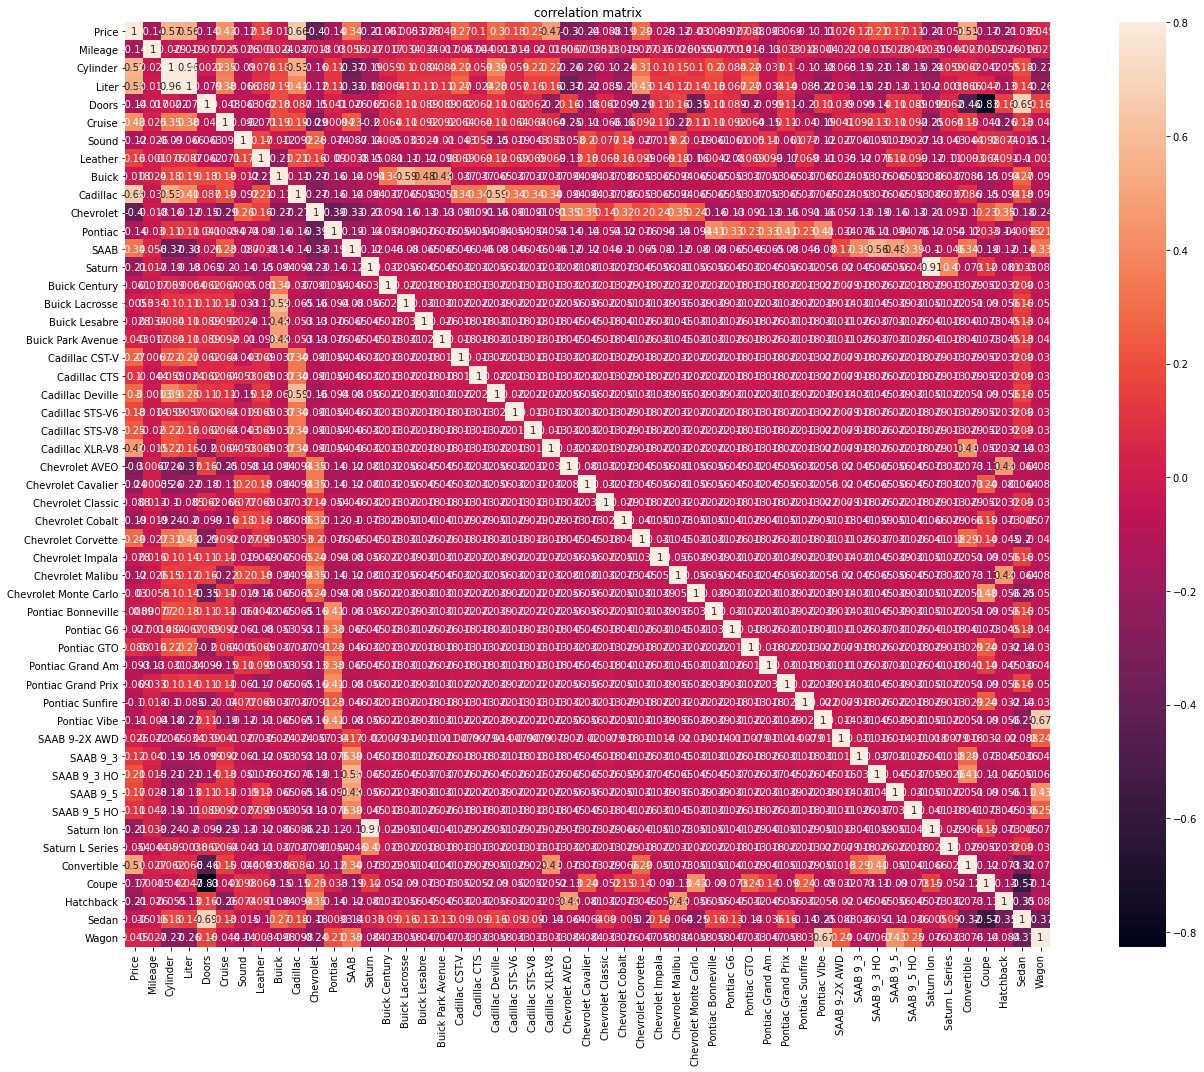

In [248]:
#just another visualization 
corr_mat = data.corr()
f, ax = plt.subplots(figsize = (25,17))
sns.heatmap(corr_mat,vmax=.8,square=True, annot = True)
plt.title("correlation matrix")
plt.show()

### ok so preparing for question 1, what aspects are significant in the resale value of a car? 
it appears as if that there are certaintly things that are highly correlated with price, cylenders, convertable, leiters, milage, cadalac, are pretty correlated, I think I will stay true to my economics training and start with just a simple OLS, see what is and isn't significant, then go for a more robust, boosted random forest or something after that 

In [249]:
#first we need to control for the skewness in our price variable 
data['ln_price'] = data.Price.apply(lambda x: np.log(x))

In [250]:
data.columns

Index(['Price', 'Mileage', 'Make', 'Model', 'Trim', 'Type', 'Cylinder',
       'Liter', 'Doors', 'Cruise', 'Sound', 'Leather', 'Buick', 'Cadillac',
       'Chevrolet', 'Pontiac', 'SAAB', 'Saturn', 'make*trim', 'Buick Century',
       'Buick Lacrosse', 'Buick Lesabre', 'Buick Park Avenue',
       'Cadillac CST-V', 'Cadillac CTS', 'Cadillac Deville', 'Cadillac STS-V6',
       'Cadillac STS-V8', 'Cadillac XLR-V8', 'Chevrolet AVEO',
       'Chevrolet Cavalier', 'Chevrolet Classic', 'Chevrolet Cobalt',
       'Chevrolet Corvette', 'Chevrolet Impala', 'Chevrolet Malibu',
       'Chevrolet Monte Carlo', 'Pontiac Bonneville', 'Pontiac G6',
       'Pontiac GTO', 'Pontiac Grand Am', 'Pontiac Grand Prix',
       'Pontiac Sunfire', 'Pontiac Vibe', 'SAAB 9-2X AWD', 'SAAB 9_3',
       'SAAB 9_3 HO', 'SAAB 9_5', 'SAAB 9_5 HO', 'Saturn Ion',
       'Saturn L Series', 'Convertible', 'Coupe', 'Hatchback', 'Sedan',
       'Wagon', 'ln_price'],
      dtype='object')

In [251]:
#ok so now lets select some of our data, leaving one out for each of the categorical variables,
#We'll probably start with a bigger data set, but then widdle it down to avoid over fitting

#I  also need to leave out one of the make*trim variables, so  I don't have perfect knowledge 
#I will leave out 'SAAB 9-2X AWD' cuz it only has 4 observations 

X = data[['Mileage', 'Cylinder', 'Doors', #continuous 
          'Cruise', 'Sound', 'Leather', #binary 
          'Buick', 'Cadillac','Chevrolet', 'Pontiac', 'SAAB', #need to leave one out so saturn got chopped 
          #make*trim
          'Buick Century','Buick Lacrosse', 'Buick Lesabre', 'Buick Park Avenue',
          'Cadillac CST-V', 'Cadillac CTS', 'Cadillac Deville', 'Cadillac STS-V6',
          'Cadillac STS-V8', 'Cadillac XLR-V8', 'Chevrolet AVEO',
          'Chevrolet Cavalier', 'Chevrolet Classic', 'Chevrolet Cobalt',
          'Chevrolet Corvette', 'Chevrolet Impala', 'Chevrolet Malibu',
          'Chevrolet Monte Carlo', 'Pontiac Bonneville', 'Pontiac G6',
        'Pontiac GTO', 'Pontiac Grand Am', 'Pontiac Grand Prix',
        'Pontiac Sunfire', 'Pontiac Vibe', 'SAAB 9_3',
       'SAAB 9_3 HO', 'SAAB 9_5', 'SAAB 9_5 HO', 'Saturn Ion',
       'Saturn L Series', 
          
       'Convertible', 'Coupe', 'Hatchback', 'Sedan', #typel, and wagon get the chopping block cuz its lame lol
                
               ]]

y =  data.ln_price

In [252]:
reg_obj = sm.OLS(y ,X)

results = reg_obj.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     924.5
Date:                Wed, 27 Jan 2021   Prob (F-statistic):               0.00
Time:                        21:57:56   Log-Likelihood:                 1144.6
No. Observations:                 804   AIC:                            -2207.
Df Residuals:                     763   BIC:                            -2015.
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Mileage               -8.004e-

In [278]:
#ok so it looks like we really can get rid of a few columns that are statistically not significant 
#so we could get rid of 
X2 = X.drop(columns = ["Cruise", "Sound", 'Buick Century',
                       'Chevrolet Classic',  'Chevrolet Cobalt', 'Cadillac CTS',
                       'Pontiac Grand Prix', 'Pontiac Vibe',  'Hatchback','SAAB 9_3',
                       "Sedan"
                       
                      ])
reg_obj = sm.OLS(y ,X2)

results = reg_obj.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     1110.
Date:                Wed, 27 Jan 2021   Prob (F-statistic):               0.00
Time:                        23:58:38   Log-Likelihood:                 1137.1
No. Observations:                 804   AIC:                            -2206.
Df Residuals:                     770   BIC:                            -2047.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Mileage               -7.986e-

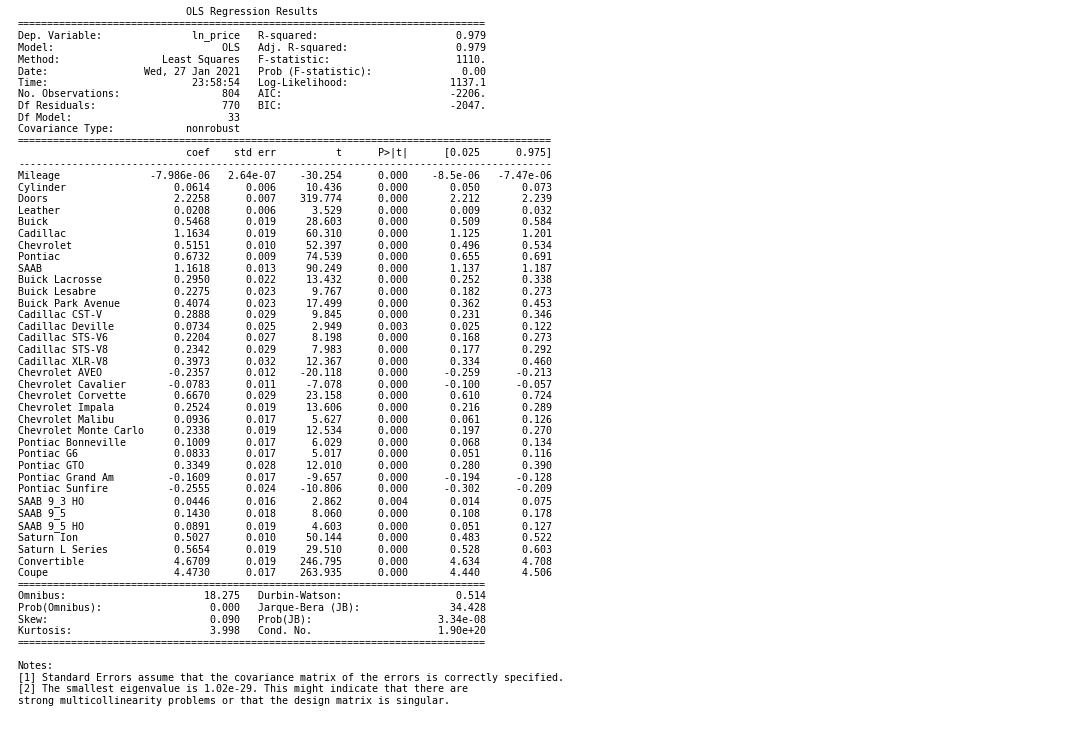

In [279]:

plt.rc('figure', figsize=(15, 10))
#plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 12}) old approach
plt.text(0.01, 0.05, str(results.summary()), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()
plt.savefig('output.png')

In [290]:
#Answer to #1 so far is that the features which appear to be important to predicting are the following 
print(X2.columns.tolist())

['Mileage', 'Cylinder', 'Doors', 'Leather', 'Buick', 'Cadillac', 'Chevrolet', 'Pontiac', 'SAAB', 'Buick Lacrosse', 'Buick Lesabre', 'Buick Park Avenue', 'Cadillac CST-V', 'Cadillac Deville', 'Cadillac STS-V6', 'Cadillac STS-V8', 'Cadillac XLR-V8', 'Chevrolet AVEO', 'Chevrolet Cavalier', 'Chevrolet Corvette', 'Chevrolet Impala', 'Chevrolet Malibu', 'Chevrolet Monte Carlo', 'Pontiac Bonneville', 'Pontiac G6', 'Pontiac GTO', 'Pontiac Grand Am', 'Pontiac Sunfire', 'SAAB 9_3 HO', 'SAAB 9_5', 'SAAB 9_5 HO', 'Saturn Ion', 'Saturn L Series', 'Convertible', 'Coupe']


The grader will note that each of these columns was statistically significant in the linear regression above, and that the regression in question appears to follow all of the assumptions that we need, the grader will note the scatter plots above 

#2 what could be useful in getting better predictions. 
Knowing if it was a rebuilt title or not, the age of the previous owner, like if the previous owners gender perhaps, you could see if men or women drive more aggressively than the other, where geographically the car is, maybe humid climates or more mountinous regions are harder on the cars body or engine or something, things like that would be good to have in the data. Also miles per galon, it's possible that high fuel efficiency has a positive influence on resale value, also the age of the vehicle.. we could approximate age, by using the "average amount driven" a year, which according to google is 13,500 miles, so you could divide milage by that figure to get approximate age...  Other data that would be super useful would be the price paid originally for the car, that would essentially create a ceiling for how hight the car could be worth, because I am not aware of any car that appreciates in value. 



3. Generally, as mileage increases, the price should decrease. But, does the amount of decrease in value from additional mileage differ depending upon the make of the car? If so, which makes hold the value better with more miles?

from the table above we can see that the OLS coefficient on milage, inturpreting the scientific notation, the coefficient on milage = -7.88e^(06) = -0.0195, however we regressed on log price, so the inturpretation of this is that for every mile driven the price of the car goes down by ln(-.0195) so we need to raise it to the e again to get back into the dollars world, and when we take that value, we get 0.981. So the intrurpretation is that for every mile you drive, your car loses essentially one dollar in value. However this is not the real effect, perhaps it would be better  it we took the square root of miles or something, because if we take this number -.981 and if we multiply by 150,000, our car would have devalued by $147150. which is clearly not possible because not one car was worth that much, however within the data set, there  wasnt a car that had been driven that far so in the model this is the effect but this is unlikley to be the effect in the wild

In [256]:
#I think to answer this question create interactions between makes and mileage and then compare ANOVA plots w/ 
#F statistics on a regression without the interactions, then inturpret the F statistics 

'''
I dont really know how else to do this, there has gotta be a function i was just gonna code up a function'''

def mileage_make_int(df):
    p  =  [] #pontiac
    saab  = [] #saab
    b = [] #buick
    c = [] #chevy
    sat = []#saturn 
    cad = []  #cadalac
    
    
    for i in range(len(df)):
        if df.Make[i] == "Pontiac":
            p.append(df.Mileage[i])
            saab.append(0)
            b.append(0)
            c.append(0)
            sat.append(0)
        elif df.Make[i] == "SAAB":
            p.append(0)
            saab.append(df.Mileage[i])
            b.append(0)
            c.append(0)
            sat.append(0) 
        elif df.Make[i] == 'Buick':
            p.append(0)
            saab.append(0)
            b.append(df.Mileage[i])
            c.append(0)
            sat.append(0)
        elif df.Make[i] == 'Chevrolet':
            p.append(0)
            saab.append(0)
            b.append(0)
            c.append(df.Mileage[i])
            sat.append(0)
        elif df.Make[i] == 'Saturn':
            p.append(0)
            saab.append(0)
            b.append(0)
            c.append(0)
            sat.append(df.Mileage[i])
        else: #cadallac case 
            p.append(0)
            saab.append(0)
            b.append(0)
            c.append(0)
            sat.append(0)
            cad.append(df.Mileage[i])

    df['pontiat*mileage'] = p
    df['saab*mileage'] = saab
    df['buick*mileage'] = b
    df['chevy*mileage'] = c
    df['saturn*mileage'] = sat
    df['cad*mileage']  = c
    
    return  df 

In [257]:
data2 = mileage_make_int(data)

In [258]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

X3 = data2[['Mileage', 
           'pontiat*mileage', 'saab*mileage', 'buick*mileage',
            'chevy*mileage', 'cad*mileage', 'saturn*mileage']]
m = data.Mileage
reg_obj1 = sm.OLS(y ,m)
reg_obj2 = sm.OLS(y, X3)

results1 = reg_obj1.fit()
results2 = reg_obj2.fit()

anovaResults = anova_lm(results1, results2)
print(anovaResults)

   df_resid           ssr  df_diff    ss_diff         F    Pr(>F)
0     803.0  11909.945893      0.0        NaN       NaN       NaN
1     798.0  11836.954125      5.0  72.991768  0.984162  0.426353


so  what this is testing, if we are the interactions terms 0 or not, and  becauset here is lots of  interactions, because there are more than 1 term, it has to do an f test to see if all of them  are simultaniously = to 0. Well I think that all of the interactions are a wash, so my conclusion is mileage does impact, but thats about the same regardless of what car you're looking at.  

So  f tests are testing lots of things simulaneiously. 

4. Which car (and with what characteristics) has the highest resale value at 15000 miles?

In [259]:
miles = data.loc[data["Mileage"]>=15000]
len(miles)

594

ok so we have 594 cars with more than 15k miles, and we need to find which of all of the car makes, has the highest resale value, 

In [299]:
m2 = pd.DataFrame(miles.groupby(['Make', "Trim", "Model", "Type",
                                 "Cylinder", "Liter", "Doors",])["Mileage", "Price"].mean())


In [300]:
m2.sort_values(by='Price', ascending=False).head(10)

Mileage  \
Make      Trim         Model    Type        Cylinder Liter Doors                 
Cadillac  Hardtop Conv XLR-V8   Convertible 8        4.6   2      26791.500000   
          Sedan        CST-V    Sedan       8        5.7   4      23063.250000   
                       STS-V8   Sedan       8        4.6   4      23818.285714   
Chevrolet Conv         Corvette Convertible 8        6.0   2      26249.333333   
Cadillac  DHS Sedan    Deville  Sedan       8        4.6   4      21768.000000   
          Sedan        STS-V6   Sedan       6        3.6   4      23407.428571   
          DTS Sedan    Deville  Sedan       8        4.6   4      28851.666667   
SAAB      Arc Conv     9_3 HO   Convertible 4        2.0   2      25279.500000   
Chevrolet Coupe        Corvette Coupe       8        6.0   2      25657.400000   
SAAB      Linear Conv  9_3      Convertible 4        2.0   2      22985.750000   

                                                                         Price  
Make      Trim         Model    Type        Cylinder Liter Doors                
Cadillac  Hardtop Conv XLR-V8   Convertible 8        4.6   2      59092.945508  
          Sedan        CST-V    Sedan       8        5.7   4      43728.379774  
                       STS-V8   Sedan       8        4.6   4      41158.031366  
Chevrolet Conv         Corvette Convertible 8        6.0   2      38949.233075  
Cadillac  DHS Sedan    Deville  Sedan       8        4.6   4      36809.518118  
          Sedan        STS-V6   Sedan       6        3.6   4      35891.761820  
          DTS Sedan    Deville  Sedan       8        4.6   4      35465.800660  
SAAB      Arc Conv     9_3 HO   Convertible 4        2.0   2      34376.351260  
Chevrolet Coupe        Corvette Coupe       8        6.0   2      34212.023050  
SAAB      Linear Conv  9_3      Convertible 4        2.0   2      32200.232729

So here are the top 10 cars with the highest resale value, funnily enough, there are the same  amount  of two doors as there are to 4 doors, however the highest valued car at 15k miles is the cadillad card  top convertablee with a 4.6 liter, V8 engine. Sold for an average of almost 60k resale which is crazy to me. Like practical ol' me saying you could get a really nice new car for that much money.. but also idk if I could ever drive something that expensive  in the first place so whatever lol but yeah, that's the  answer to question 4

In [262]:
#importing more machine learning  frameworks 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import warnings; warnings.simplefilter('ignore')
import xgboost as xgb

from sklearn.ensemble import RandomForestRegressor
from xgboost import plot_importance


In [263]:
def trendline(xd, yd, order=1, c='r', alpha=1, Rval=False):
    """Make a line of best fit"""

    #Calculate trendline
    coeffs = np.polyfit(xd, yd, order)

    intercept = coeffs[-1]
    slope = coeffs[-2]
    power = coeffs[0] if order == 2 else 0

    minxd = np.min(xd)
    maxxd = np.max(xd)

    xl = np.array([minxd, maxxd])
    yl = power * xl ** 2 + slope * xl + intercept

    #Plot trendline
    plt.plot(xl, yl, c, alpha=alpha)

    #Calculate R Squared
    p = np.poly1d(coeffs)

    ybar = np.sum(yd) / len(yd)
    ssreg = np.sum((p(xd) - ybar) ** 2)
    sstot = np.sum((yd - ybar) ** 2)
    Rsqr = ssreg / sstot

    if not Rval:
        #Plot R^2 value
        plt.text(0.8 * maxxd + 0.2 * minxd, 0.8 * np.max(yd) + 0.2 * np.min(yd),
                 '$R^2 = %0.2f$' % Rsqr)
    else:
        #Return the R^2 value:
        return Rsqr

In [280]:
#============================================================================================================
def train_predict(df, var_df):
    target = df['ln_price']
    #target = norm['total compensation']
    X = var_df
    #splitting into train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.20, 
                                                    random_state=17)

    #going to train_test_val
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
                                                  test_size=0.2, 
                                                  random_state=17)

    #xclass = xgb.XGBRegressor(booster = 'dart')
    rf2 = RandomForestRegressor()

    parameters = {
        #'learning_rate': [.01, .02, .03, .04, .05], # np.arange(.01, 1, .01), #LOOK AT INCREASING STEP SIZES
        'min_samples_split': [2,4,6,8],
        'max_depth': [25, 30, 35, 37, 40, 45, 50], #np.arange(1, 100, 1), #
        #'min_child_samples': [1, 3, 5], #np.arange(1, 15, 2), #,
        'min_samples_leaf': [1, 2, 3],
        #'subsample': np.arange(.3, .7, .1),
        #'colsample_bytree': np.arange(.1, 1, .1),
        'n_estimators' :[700, 800, 900, 1000, 1100, 1200], #np.arange(100, 1200, 100), #
        #'objective': ['reg:squarederror'],  
        }
 
    #gs = RandomizedSearchCV(xclass, parameters, cv = 5
    #gs.fit(X_train, y_train)
    
    gs2 = RandomizedSearchCV(rf2, parameters, cv = 5)
    gs2.fit(X_train, y_train)
    
    #adjusting back from the log that we took 
    rf_pred2 = np.e**(gs2.predict(X_val))

    mae_rf = mean_absolute_error(rf_pred2, np.e**(y_val))
    print("mean_absolute_error")
    print(mae_rf)    
    print(" ")
    print("root_mean_squarered_error")
    mse_rf = (mean_squared_error(rf_pred2, np.e**(y_val)))**(1/2)
    print(mse_rf)

    plt.scatter(x = rf_pred2, y = np.e**y_val, color = "blue")
    plt.title("Random Forest CV = 5, base salary excluded")
    plt.xlabel('True resale_value')
    plt.ylabel("Predicted resale_value")
    trendline(rf_pred2, np.e**(y_val))
    plt.show()
    
    #looking at how we did 
    #boost_preds = gs.predict(X_val)

    #mae_xgb = mean_absolute_error(np.e**(boost_preds), np.e**(y_val))
    #mse_xgb = mean_squared_error(np.e**(boost_preds), np.e**(y_val))
    #print("overall MAE")
    #print(mae_xgb)  
    #print(" ")
    #print(mse_xgb)

    #plt.scatter(x = rf_pred2, y = np.e**y_val, color = "blue")
    #plt.scatter(x = np.e**(y_val), y = np.e**(boost_preds), color = "lightgreen")
    #plt.title("xgboost CV = 5")
    #plt.xlabel('resale_value')
    #plt.ylabel("predicted_resale_value")
    #trendline(np.e**(boost_preds), np.e**(y_val))
    #plt.show()

    #X_val['predicted'] = boost_preds
    #X_val['actual'] = y_val
    
    y = np.sort(gs2.best_estimator_.feature_importances_)[::-1]
    x = X.columns[np.argsort(gs2.best_estimator_.feature_importances_)[::-1]]
    plt.barh(x[:10],y[:10])
    plt.tight_layout()
    plt.xlabel('Feature importance on testing')
    plt.ylabel('Feature name')
    plt.title('Feature importances in Prediction of Resale Value by way of Random Forest on Validatoin set')
    plt.show() 
    
    return gs2, mse_rf, mae_rf

mean_absolute_error
1133.592037714848
 
root_mean_squarered_error
1555.3975375599382


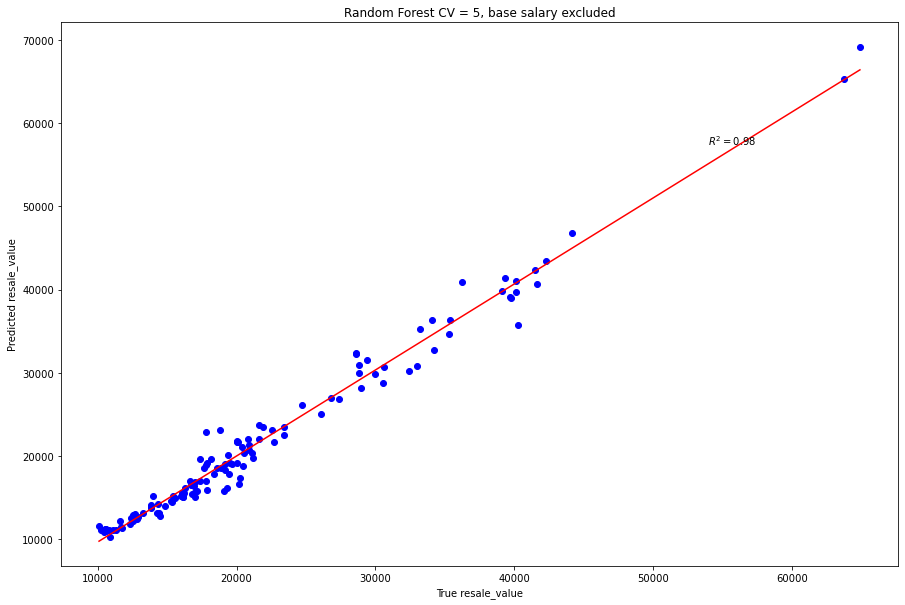

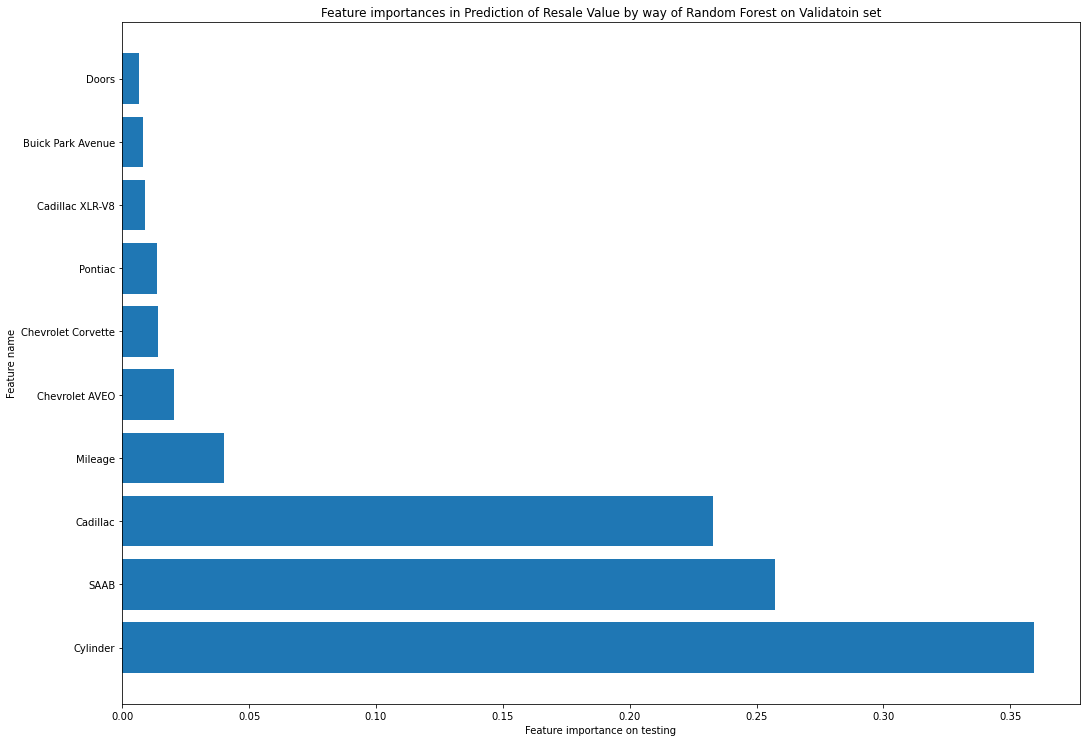

In [281]:
rf, mse_rf, mae_rf = train_predict(data2, X2)

now we need  to create the data  given to be in the  same eform so that we can predict on it 
so we are given 

5. What is a reasonable resale value for the following vehicle: Cadillac CTS 4D Sedan with 17,000 miles, 6 cylinder, 2.8 liter engine, cruise control, upgraded speakers and leather seats?

In [291]:
X2.columns
#     
x = np.array([17000, 6, 4, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
    0, 0, 0, 0, 0, 0])
x = x.reshape(-1,35)

In [292]:
pred_value = np.e**(rf.predict(x)[0])
print(pred_value)
print("This is our predicted resale value")

31560.387814964008
This is our predicted resale value


In [294]:
pred_range = (pred_value - mse_rf, pred_value+mse_rf)
print(pred_range)
print("this is our predicted price range")

(30004.99027740407, 33115.78535252395)
this is our predicted price range


In [293]:
print(mae_rf)
print(mse_rf)

1133.592037714848
1555.3975375599382
